In [83]:
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA

from stable_baselines3 import A2C,DQN,PPO
from stable_baselines3.common.vec_env import DummyVecEnv

In [47]:
gme = yf.download('GME',start='2020-03-16',end='2021-03-12')

[*********************100%***********************]  1 of 1 completed


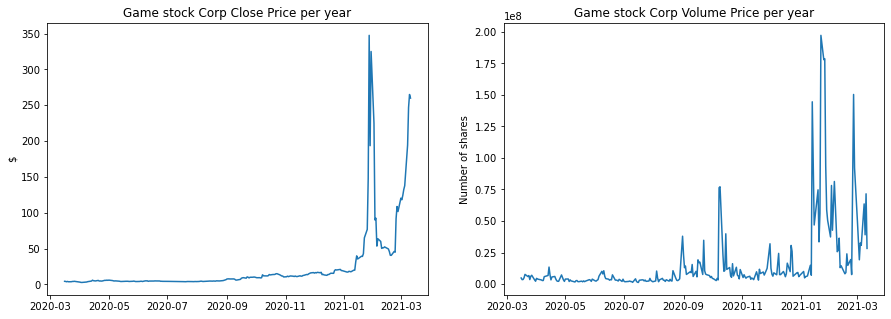

In [154]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(gme['Close'])
ax2.plot(gme['Volume'])
ax1.set_title('Game stock Corp Close Price per year')
ax1.set_ylabel('$')
ax2.set_title('Game stock Corp Volume Price per year')
ax2.set_ylabel('Number of shares')
plt.show()

## Part I : Data Processing & Environment Generation

In [60]:
def ta_add(df):
    df['SMA'] = TA.SMA(df,12)
    df['RSI'] = TA.RSI(df)
    df['OBV'] = TA.OBV(df)
    df.fillna(0, inplace=True)
def add_signals2(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features
class MyCustomEnv2(StocksEnv):
    _process_data = add_signals2

In [50]:
ta_add(gme)
gme_df = gme.copy()
gme_ta = gme_df.drop(['Adj Close'],axis=1)
gme = gme_df.drop(['Adj Close','SMA','RSI','OBV'],axis=1)

Text(0.5, 1.0, 'ON Balance Volume (OBV) of Game Stop Corp per date')

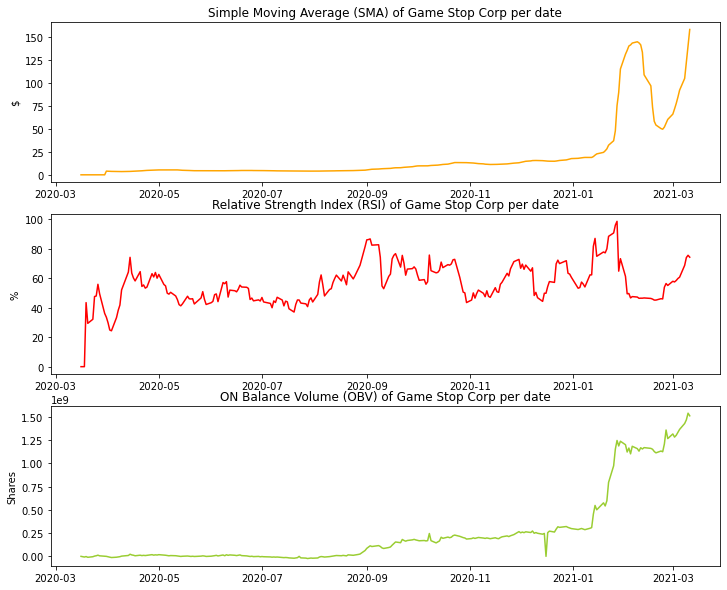

In [155]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,10))
ax1.plot(gme_ta['SMA'],color='orange')
ax2.plot(gme_ta['RSI'],color='r')
ax3.plot(gme_ta['OBV'],color='yellowgreen')
ax1.set_ylabel('$')
ax2.set_ylabel('%')
ax3.set_ylabel('Shares')
ax1.set_title('Simple Moving Average (SMA) of Game Stop Corp per date')
ax2.set_title('Relative Strength Index (RSI) of Game Stop Corp per date')
ax3.set_title('ON Balance Volume (OBV) of Game Stop Corp per date')

In [65]:
env = DummyVecEnv([lambda: gym.make('stocks-v0',df=gme,frame_bound=(5,100),window_size=5)])
env2 = DummyVecEnv([lambda: MyCustomEnv2(df=gme_ta, window_size=12, frame_bound=(12,50))])

## PART II : RL Algorithm + Data with General Data
### Advantage Actor Critic algorithm (A2C)

In [9]:
a2c = A2C('MlpPolicy',env,verbose=1)
a2c.learn(total_timesteps=100000)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 967       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.208    |
|    explained_variance | -54.3     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0.000917 |
|    value_loss         | 0.000463  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1010     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.444   |
|    explained_variance | -0.204   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.0421  |
|    va

------------------------------------
| time/                 |          |
|    fps                | 1069     |
|    iterations         | 1700     |
|    time_elapsed       | 7        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.322   |
|    explained_variance | -58.8    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 0.000765 |
|    value_loss         | 0.000255 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1061      |
|    iterations         | 1800      |
|    time_elapsed       | 8         |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.225    |
|    explained_variance | -0.558    |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -0.000435 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1045     |
|    iterations         | 3300     |
|    time_elapsed       | 15       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.197   |
|    explained_variance | -6.3     |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | -0.00291 |
|    value_loss         | 0.0023   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1045      |
|    iterations         | 3400      |
|    time_elapsed       | 16        |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.0237   |
|    explained_variance | 0.348     |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -6.63e-05 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1042     |
|    iterations         | 4900     |
|    time_elapsed       | 23       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.00127 |
|    explained_variance | -5.61    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 0.000116 |
|    value_loss         | 0.865    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1044     |
|    iterations         | 5000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.0828  |
|    explained_variance | 0.77     |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.000332 |
|    value_loss         | 0.000184 |
-

------------------------------------
| time/                 |          |
|    fps                | 1054     |
|    iterations         | 6500     |
|    time_elapsed       | 30       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.0543  |
|    explained_variance | 0.257    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | 0.00287  |
|    value_loss         | 0.0333   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1055     |
|    iterations         | 6600     |
|    time_elapsed       | 31       |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.115   |
|    explained_variance | 0.1      |
|    learning_rate      | 0.0007   |
|    n_updates          | 6599     |
|    policy_loss        | -0.113   |
|    value_loss         | 2.43     |
-

------------------------------------
| time/                 |          |
|    fps                | 1067     |
|    iterations         | 8100     |
|    time_elapsed       | 37       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.00023 |
|    explained_variance | -3.23    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 1.98e-07 |
|    value_loss         | 0.000743 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1068     |
|    iterations         | 8200     |
|    time_elapsed       | 38       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.00271 |
|    explained_variance | -27.4    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | 0.000344 |
|    value_loss         | 0.69     |
-

------------------------------------
| time/                 |          |
|    fps                | 1060     |
|    iterations         | 9700     |
|    time_elapsed       | 45       |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | -4.42    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | 0.00183  |
|    value_loss         | 0.00159  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1060     |
|    iterations         | 9800     |
|    time_elapsed       | 46       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.00136 |
|    explained_variance | 0.994    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 6.19e-06 |
|    value_loss         | 0.00135  |
-

------------------------------------
| time/                 |          |
|    fps                | 1061     |
|    iterations         | 11300    |
|    time_elapsed       | 53       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.0611  |
|    explained_variance | 0.417    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | -0.0345  |
|    value_loss         | 2.28     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1061      |
|    iterations         | 11400     |
|    time_elapsed       | 53        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.0254   |
|    explained_variance | -0.0802   |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -0.000465 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1062     |
|    iterations         | 12900    |
|    time_elapsed       | 60       |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.00146 |
|    explained_variance | -29.6    |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 6.29e-05 |
|    value_loss         | 0.298    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1062      |
|    iterations         | 13000     |
|    time_elapsed       | 61        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.000716 |
|    explained_variance | -4.23     |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -1.57e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1060     |
|    iterations         | 14500    |
|    time_elapsed       | 68       |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.00178 |
|    explained_variance | 0.983    |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | 2.44e-05 |
|    value_loss         | 0.00919  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1060     |
|    iterations         | 14600    |
|    time_elapsed       | 68       |
|    total_timesteps    | 73000    |
| train/                |          |
|    entropy_loss       | -0.0136  |
|    explained_variance | -135     |
|    learning_rate      | 0.0007   |
|    n_updates          | 14599    |
|    policy_loss        | -0.00132 |
|    value_loss         | 0.165    |
-

------------------------------------
| time/                 |          |
|    fps                | 1057     |
|    iterations         | 16100    |
|    time_elapsed       | 76       |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.101   |
|    explained_variance | -3.19    |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | -0.164   |
|    value_loss         | 0.145    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1058      |
|    iterations         | 16200     |
|    time_elapsed       | 76        |
|    total_timesteps    | 81000     |
| train/                |           |
|    entropy_loss       | -0.0237   |
|    explained_variance | 0.811     |
|    learning_rate      | 0.0007    |
|    n_updates          | 16199     |
|    policy_loss        | -5.09e-05 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1056      |
|    iterations         | 17700     |
|    time_elapsed       | 83        |
|    total_timesteps    | 88500     |
| train/                |           |
|    entropy_loss       | -3.67e-05 |
|    explained_variance | -14.6     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17699     |
|    policy_loss        | -3.57e-07 |
|    value_loss         | 0.0331    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1056      |
|    iterations         | 17800     |
|    time_elapsed       | 84        |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -0.000529 |
|    explained_variance | -20.7     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | 2.68e-06  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1051     |
|    iterations         | 19300    |
|    time_elapsed       | 91       |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.132   |
|    explained_variance | -0.719   |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | -0.278   |
|    value_loss         | 1.4      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1051      |
|    iterations         | 19400     |
|    time_elapsed       | 92        |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -0.000915 |
|    explained_variance | -19.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 19399     |
|    policy_loss        | -8.91e-07 |
|    value_loss         | 

In [122]:
env_a2c = gym.make('stocks-v0', df=gme, frame_bound=(15,150), window_size=5)
obs = env_a2c.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = a2c.predict(obs)
    obs, rewards, done, info = env_a2c.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 10.610002517700195, 'total_profit': 4.150624122445665, 'position': 0}


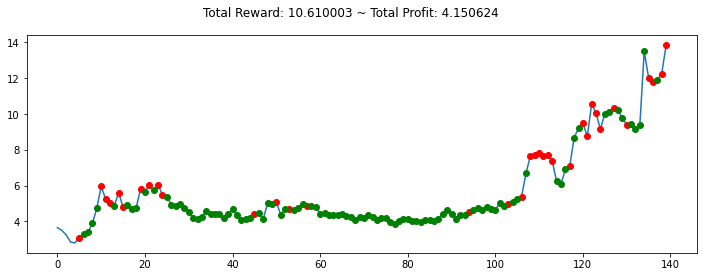

In [158]:
plt.figure(figsize=(12,4))
plt.cla()
env_a2c.render_all()
plt.show()

### Deep Q Network (DQN)

In [14]:
dqn = DQN("MlpPolicy", env, verbose=1)
dqn.learn(total_timesteps=100000, log_interval=4)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11272    |
|    time_elapsed     | 0        |
|    total_timesteps  | 376      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11520    |
|    time_elapsed     | 0        |
|    total_timesteps  | 752      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 11366    |
|    time_elapsed     | 0        |
|    total_timesteps  | 1128     |
----------------------------------
----------------------------------
| r

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 10978    |
|    time_elapsed     | 0        |
|    total_timesteps  | 10152    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 10913    |
|    time_elapsed     | 0        |
|    total_timesteps  | 10528    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 10831    |
|    time_elapsed     | 1        |
|    total_timesteps  | 10904    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 10917    |
|    time_elapsed     | 1        |
|    total_timesteps  | 20304    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 10916    |
|    time_elapsed     | 1        |
|    total_timesteps  | 20680    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 10925    |
|    time_elapsed     | 1        |
|    total_timesteps  | 21056    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 11153    |
|    time_elapsed     | 2        |
|    total_timesteps  | 30456    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 11155    |
|    time_elapsed     | 2        |
|    total_timesteps  | 30832    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 11157    |
|    time_elapsed     | 2        |
|    total_timesteps  | 31208    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 11167    |
|    time_elapsed     | 3        |
|    total_timesteps  | 40608    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 11176    |
|    time_elapsed     | 3        |
|    total_timesteps  | 40984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 11212    |
|    time_elapsed     | 3        |
|    total_timesteps  | 41360    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 10557    |
|    time_elapsed     | 4        |
|    total_timesteps  | 50384    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0662   |
|    n_updates        | 95       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 10015    |
|    time_elapsed     | 5        |
|    total_timesteps  | 50760    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0159   |
|    n_updates        | 189      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 612      |
|    fps              | 5183     |
|    time_elapsed     | 11       |
|    total_timesteps  | 57528    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0188   |
|    n_updates        | 1881     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 616      |
|    fps              | 5052     |
|    time_elapsed     | 11       |
|    total_timesteps  | 57904    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0152   |
|    n_updates        | 1975     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 3853     |
|    time_elapsed     | 16       |
|    total_timesteps  | 64672    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0116   |
|    n_updates        | 3667     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 3796     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65048    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0575   |
|    n_updates        | 3761     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 3184     |
|    time_elapsed     | 22       |
|    total_timesteps  | 71816    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00798  |
|    n_updates        | 5453     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 768      |
|    fps              | 3164     |
|    time_elapsed     | 22       |
|    total_timesteps  | 72192    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00732  |
|    n_updates        | 5547     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 2846     |
|    time_elapsed     | 27       |
|    total_timesteps  | 78960    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0181   |
|    n_updates        | 7239     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 844      |
|    fps              | 2831     |
|    time_elapsed     | 28       |
|    total_timesteps  | 79336    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0148   |
|    n_updates        | 7333     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 916      |
|    fps              | 2607     |
|    time_elapsed     | 33       |
|    total_timesteps  | 86104    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0122   |
|    n_updates        | 9025     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 920      |
|    fps              | 2596     |
|    time_elapsed     | 33       |
|    total_timesteps  | 86480    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0102   |
|    n_updates        | 9119     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 2425     |
|    time_elapsed     | 38       |
|    total_timesteps  | 93248    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00228  |
|    n_updates        | 10811    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 996      |
|    fps              | 2417     |
|    time_elapsed     | 38       |
|    total_timesteps  | 93624    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0198   |
|    n_updates        | 10905    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

In [123]:
env_dqn = gym.make('stocks-v0', df=gme, frame_bound=(15,150), window_size=5)
obs = env_dqn.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = dqn.predict(obs)
    obs, rewards, done, info = env_dqn.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 7.340000629425049, 'total_profit': 1.7445620755675717, 'position': 0}


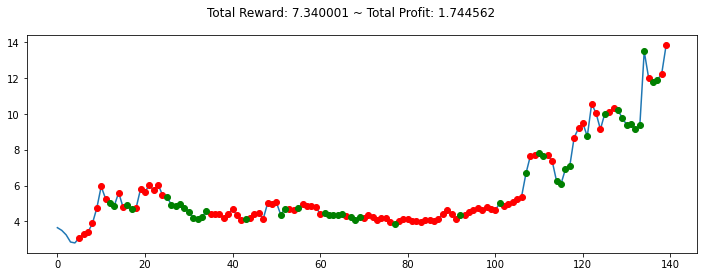

In [159]:
plt.figure(figsize=(12,4))
plt.cla()
env_dqn.render_all()
plt.show()

### Proximal Policy Optimization (PPO)

In [17]:
ppo = PPO("MlpPolicy", env, verbose=1)
ppo.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2162 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1422        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011480896 |
|    clip_fraction        | 0.0143      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.0331      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.108       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0019     |
|    value_loss           | 0.208       |
-----------------------------------------
-----------------

-----------------------------------------
| time/                   |             |
|    fps                  | 1046        |
|    iterations           | 13          |
|    time_elapsed         | 25          |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.005987412 |
|    clip_fraction        | 0.0569      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.412      |
|    explained_variance   | 0.755       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.155       |
|    n_updates            | 120         |
|    policy_gradient_loss | 0.000587    |
|    value_loss           | 0.338       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1047         |
|    iterations           | 14           |
|    time_elapsed         | 27           |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 1050        |
|    iterations           | 24          |
|    time_elapsed         | 46          |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.008428823 |
|    clip_fraction        | 0.0527      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.207      |
|    explained_variance   | 0.89        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.117       |
|    n_updates            | 230         |
|    policy_gradient_loss | 0.00104     |
|    value_loss           | 0.264       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1052        |
|    iterations           | 25          |
|    time_elapsed         | 48          |
|    total_timesteps      | 51200 

-----------------------------------------
| time/                   |             |
|    fps                  | 1045        |
|    iterations           | 35          |
|    time_elapsed         | 68          |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.006396538 |
|    clip_fraction        | 0.0445      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.128      |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0672      |
|    n_updates            | 340         |
|    policy_gradient_loss | 0.0009      |
|    value_loss           | 0.105       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1043         |
|    iterations           | 36           |
|    time_elapsed         | 70           |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 1050         |
|    iterations           | 46           |
|    time_elapsed         | 89           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0041106152 |
|    clip_fraction        | 0.0336       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0756      |
|    explained_variance   | 0.993        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0154       |
|    n_updates            | 450          |
|    policy_gradient_loss | 0.000723     |
|    value_loss           | 0.0215       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1049        |
|    iterations           | 47          |
|    time_elapsed         | 91          |
|    total_times

In [124]:
env_ppo = gym.make('stocks-v0', df=gme, frame_bound=(15,150), window_size=5)
obs = env_ppo.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = ppo.predict(obs)
    obs, rewards, done, info = env_ppo.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 9.400001049041748, 'total_profit': 3.2943003390016936, 'position': 0}


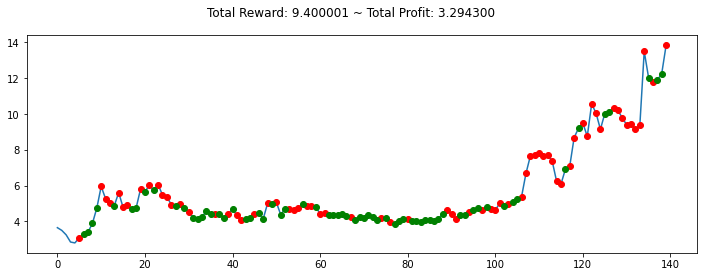

In [160]:
plt.figure(figsize=(12,4))
plt.cla()
env_ppo.render_all()
plt.show()

## PART III : RL Algorithm + Data with Technical Analysis
### Advantage Actor Critic algorithm (A2C)

In [70]:
a2c2 = A2C('MlpPolicy',env2,verbose=1)
a2c2.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1024     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0.359    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.142   |
|    value_loss         | 0.0703   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 997       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.518    |
|    explained_variance | -1.16e+04 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 0.17      |
|    valu

------------------------------------
| time/                 |          |
|    fps                | 984      |
|    iterations         | 1700     |
|    time_elapsed       | 8        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.187   |
|    explained_variance | 0.891    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 0.0105   |
|    value_loss         | 0.0396   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 976       |
|    iterations         | 1800      |
|    time_elapsed       | 9         |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.206    |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -0.000209 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 988      |
|    iterations         | 3300     |
|    time_elapsed       | 16       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.0517  |
|    explained_variance | -90      |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 0.000629 |
|    value_loss         | 0.00623  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 988      |
|    iterations         | 3400     |
|    time_elapsed       | 17       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.0307  |
|    explained_variance | 0.999    |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | 6.17e-05 |
|    value_loss         | 0.000426 |
-

------------------------------------
| time/                 |          |
|    fps                | 990      |
|    iterations         | 4900     |
|    time_elapsed       | 24       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.0553  |
|    explained_variance | 0.997    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 0.000849 |
|    value_loss         | 0.0215   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 991      |
|    iterations         | 5000     |
|    time_elapsed       | 25       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.00779 |
|    explained_variance | 0.995    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 8.24e-05 |
|    value_loss         | 0.00425  |
-

-------------------------------------
| time/                 |           |
|    fps                | 1002      |
|    iterations         | 6500      |
|    time_elapsed       | 32        |
|    total_timesteps    | 32500     |
| train/                |           |
|    entropy_loss       | -0.00244  |
|    explained_variance | 0.999     |
|    learning_rate      | 0.0007    |
|    n_updates          | 6499      |
|    policy_loss        | -1.19e-05 |
|    value_loss         | 0.000852  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1003      |
|    iterations         | 6600      |
|    time_elapsed       | 32        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.0103   |
|    explained_variance | 0.996     |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -2.63e-05 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1011     |
|    iterations         | 8100     |
|    time_elapsed       | 40       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.014   |
|    explained_variance | -3.74    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | 0.000204 |
|    value_loss         | 0.00337  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1011     |
|    iterations         | 8200     |
|    time_elapsed       | 40       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.00909 |
|    explained_variance | 0.997    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | 3.65e-05 |
|    value_loss         | 0.000537 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1011      |
|    iterations         | 9700      |
|    time_elapsed       | 47        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.000812 |
|    explained_variance | 0.592     |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | -1.2e-06  |
|    value_loss         | 0.000553  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1011      |
|    iterations         | 9800      |
|    time_elapsed       | 48        |
|    total_timesteps    | 49000     |
| train/                |           |
|    entropy_loss       | -0.00289  |
|    explained_variance | 0.963     |
|    learning_rate      | 0.0007    |
|    n_updates          | 9799      |
|    policy_loss        | -3.05e-06 |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 999      |
|    iterations         | 11300    |
|    time_elapsed       | 56       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.00549 |
|    explained_variance | 0.997    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 1.26e-06 |
|    value_loss         | 0.000132 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 999       |
|    iterations         | 11400     |
|    time_elapsed       | 57        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.00465  |
|    explained_variance | 0.998     |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -6.41e-06 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 995      |
|    iterations         | 12900    |
|    time_elapsed       | 64       |
|    total_timesteps    | 64500    |
| train/                |          |
|    entropy_loss       | -0.00812 |
|    explained_variance | 1        |
|    learning_rate      | 0.0007   |
|    n_updates          | 12899    |
|    policy_loss        | 7.55e-05 |
|    value_loss         | 0.00243  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 995       |
|    iterations         | 13000     |
|    time_elapsed       | 65        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -3.33e-05 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -4.31e-09 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 998       |
|    iterations         | 14500     |
|    time_elapsed       | 72        |
|    total_timesteps    | 72500     |
| train/                |           |
|    entropy_loss       | -0.00153  |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14499     |
|    policy_loss        | -1.02e-06 |
|    value_loss         | 9.94e-05  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 998       |
|    iterations         | 14600     |
|    time_elapsed       | 73        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.00733  |
|    explained_variance | 0.945     |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | -7.14e-06 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1001      |
|    iterations         | 16100     |
|    time_elapsed       | 80        |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -0.000246 |
|    explained_variance | 0.999     |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | 1.2e-07   |
|    value_loss         | 0.00014   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1001      |
|    iterations         | 16200     |
|    time_elapsed       | 80        |
|    total_timesteps    | 81000     |
| train/                |           |
|    entropy_loss       | -0.000223 |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 16199     |
|    policy_loss        | -8.2e-07  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1005      |
|    iterations         | 17700     |
|    time_elapsed       | 88        |
|    total_timesteps    | 88500     |
| train/                |           |
|    entropy_loss       | -0.000786 |
|    explained_variance | 0.952     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17699     |
|    policy_loss        | -1.29e-06 |
|    value_loss         | 0.000617  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1005      |
|    iterations         | 17800     |
|    time_elapsed       | 88        |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -0.000196 |
|    explained_variance | 0.998     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | 3.92e-07  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1010     |
|    iterations         | 19300    |
|    time_elapsed       | 95       |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.00132 |
|    explained_variance | 1        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | 6.07e-07 |
|    value_loss         | 2.4e-05  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1011      |
|    iterations         | 19400     |
|    time_elapsed       | 95        |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -0.000483 |
|    explained_variance | 0.79      |
|    learning_rate      | 0.0007    |
|    n_updates          | 19399     |
|    policy_loss        | -7.76e-07 |
|    value_loss         | 

In [125]:
env_a2c2 = MyCustomEnv2(df=gme_ta, window_size=12, frame_bound=(15,150))
obs = env_a2c2.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = a2c2.predict(obs)
    obs, rewards, done, info = env_a2c2.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 5.649999380111694, 'total_profit': 2.57256422746293, 'position': 0}


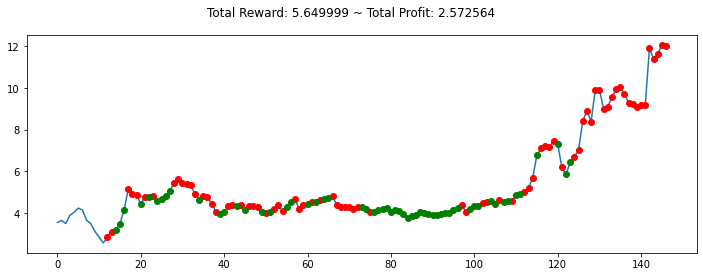

In [161]:
plt.figure(figsize=(12,4))
plt.cla()
env_a2c2.render_all()
plt.show()

### Deep Q Network (DQN)

In [73]:
dqn2 = DQN("MlpPolicy", env2, verbose=1)
dqn2.learn(total_timesteps=100000, log_interval=4)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10631    |
|    time_elapsed     | 0        |
|    total_timesteps  | 148      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 14834    |
|    time_elapsed     | 0        |
|    total_timesteps  | 296      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.958    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 12799    |
|    time_elapsed     | 0        |
|    total_timesteps  | 444      |
----------------------------------
----------------------------------
| r

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 10213    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3996     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.606    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 10318    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4144     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 10353    |
|    time_elapsed     | 0        |
|    total_timesteps  | 4292     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.241    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 10472    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7992     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.227    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 10581    |
|    time_elapsed     | 0        |
|    total_timesteps  | 8140     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.213    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 10594    |
|    time_elapsed     | 0        |
|    total_timesteps  | 8288     |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 10565    |
|    time_elapsed     | 1        |
|    total_timesteps  | 11988    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 10577    |
|    time_elapsed     | 1        |
|    total_timesteps  | 12136    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 10554    |
|    time_elapsed     | 1        |
|    total_timesteps  | 12284    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 10542    |
|    time_elapsed     | 1        |
|    total_timesteps  | 15984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 10541    |
|    time_elapsed     | 1        |
|    total_timesteps  | 16132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 10542    |
|    time_elapsed     | 1        |
|    total_timesteps  | 16280    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 10601    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19980    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 10594    |
|    time_elapsed     | 1        |
|    total_timesteps  | 20128    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 10601    |
|    time_elapsed     | 1        |
|    total_timesteps  | 20276    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 10594    |
|    time_elapsed     | 2        |
|    total_timesteps  | 23976    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 10596    |
|    time_elapsed     | 2        |
|    total_timesteps  | 24124    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 10626    |
|    time_elapsed     | 2        |
|    total_timesteps  | 24272    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 10642    |
|    time_elapsed     | 2        |
|    total_timesteps  | 27972    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 10639    |
|    time_elapsed     | 2        |
|    total_timesteps  | 28120    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 10675    |
|    time_elapsed     | 2        |
|    total_timesteps  | 28268    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 10564    |
|    time_elapsed     | 3        |
|    total_timesteps  | 31968    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 10584    |
|    time_elapsed     | 3        |
|    total_timesteps  | 32116    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 872      |
|    fps              | 10590    |
|    time_elapsed     | 3        |
|    total_timesteps  | 32264    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 10578    |
|    time_elapsed     | 3        |
|    total_timesteps  | 35964    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 976      |
|    fps              | 10576    |
|    time_elapsed     | 3        |
|    total_timesteps  | 36112    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 980      |
|    fps              | 10576    |
|    time_elapsed     | 3        |
|    total_timesteps  | 36260    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 10576    |
|    time_elapsed     | 3        |
|    total_timesteps  | 39960    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 10567    |
|    time_elapsed     | 3        |
|    total_timesteps  | 40108    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1088     |
|    fps              | 10570    |
|    time_elapsed     | 3        |
|    total_timesteps  | 40256    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 10556    |
|    time_elapsed     | 4        |
|    total_timesteps  | 43956    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1192     |
|    fps              | 10556    |
|    time_elapsed     | 4        |
|    total_timesteps  | 44104    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1196     |
|    fps              | 10549    |
|    time_elapsed     | 4        |
|    total_timesteps  | 44252    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1296     |
|    fps              | 10465    |
|    time_elapsed     | 4        |
|    total_timesteps  | 47952    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 10469    |
|    time_elapsed     | 4        |
|    total_timesteps  | 48100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 10465    |
|    time_elapsed     | 4        |
|    total_timesteps  | 48248    |
----------------------------------
----------------------------------
| rollout/          

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1388     |
|    fps              | 8604     |
|    time_elapsed     | 5        |
|    total_timesteps  | 51356    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87e+04 |
|    n_updates        | 338      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1392     |
|    fps              | 8463     |
|    time_elapsed     | 6        |
|    total_timesteps  | 51504    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.98e+04 |
|    n_updates        | 375      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1464     |
|    fps              | 6659     |
|    time_elapsed     | 8        |
|    total_timesteps  | 54168    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.44e+03 |
|    n_updates        | 1041     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 6559     |
|    time_elapsed     | 8        |
|    total_timesteps  | 54316    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01e+04 |
|    n_updates        | 1078     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1540     |
|    fps              | 5496     |
|    time_elapsed     | 10       |
|    total_timesteps  | 56980    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.38e+03 |
|    n_updates        | 1744     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 5449     |
|    time_elapsed     | 10       |
|    total_timesteps  | 57128    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01e+03 |
|    n_updates        | 1781     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1616     |
|    fps              | 4765     |
|    time_elapsed     | 12       |
|    total_timesteps  | 59792    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25e+03 |
|    n_updates        | 2447     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1620     |
|    fps              | 4733     |
|    time_elapsed     | 12       |
|    total_timesteps  | 59940    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.88e+03 |
|    n_updates        | 2484     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 4231     |
|    time_elapsed     | 14       |
|    total_timesteps  | 62604    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29e+04 |
|    n_updates        | 3150     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 4208     |
|    time_elapsed     | 14       |
|    total_timesteps  | 62752    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.05e+04 |
|    n_updates        | 3187     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 3835     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65416    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03e+03 |
|    n_updates        | 3853     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1772     |
|    fps              | 3813     |
|    time_elapsed     | 17       |
|    total_timesteps  | 65564    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75e+03 |
|    n_updates        | 3890     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1844     |
|    fps              | 3512     |
|    time_elapsed     | 19       |
|    total_timesteps  | 68228    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11e+03 |
|    n_updates        | 4556     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1848     |
|    fps              | 3496     |
|    time_elapsed     | 19       |
|    total_timesteps  | 68376    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23e+03 |
|    n_updates        | 4593     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1920     |
|    fps              | 3275     |
|    time_elapsed     | 21       |
|    total_timesteps  | 71040    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64e+04 |
|    n_updates        | 5259     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1924     |
|    fps              | 3260     |
|    time_elapsed     | 21       |
|    total_timesteps  | 71188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.82e+04 |
|    n_updates        | 5296     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1996     |
|    fps              | 3067     |
|    time_elapsed     | 24       |
|    total_timesteps  | 73852    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.79e+03 |
|    n_updates        | 5962     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2000     |
|    fps              | 3056     |
|    time_elapsed     | 24       |
|    total_timesteps  | 74000    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.45e+03 |
|    n_updates        | 5999     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 2899     |
|    time_elapsed     | 26       |
|    total_timesteps  | 76664    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.96e+03 |
|    n_updates        | 6665     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2076     |
|    fps              | 2890     |
|    time_elapsed     | 26       |
|    total_timesteps  | 76812    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.61e+03 |
|    n_updates        | 6702     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 2761     |
|    time_elapsed     | 28       |
|    total_timesteps  | 79476    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15e+03 |
|    n_updates        | 7368     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2152     |
|    fps              | 2754     |
|    time_elapsed     | 28       |
|    total_timesteps  | 79624    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.01e+03 |
|    n_updates        | 7405     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2224     |
|    fps              | 2647     |
|    time_elapsed     | 31       |
|    total_timesteps  | 82288    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27e+04 |
|    n_updates        | 8071     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2228     |
|    fps              | 2639     |
|    time_elapsed     | 31       |
|    total_timesteps  | 82436    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66e+04 |
|    n_updates        | 8108     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2300     |
|    fps              | 2531     |
|    time_elapsed     | 33       |
|    total_timesteps  | 85100    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27e+03 |
|    n_updates        | 8774     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 2527     |
|    time_elapsed     | 33       |
|    total_timesteps  | 85248    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5e+03  |
|    n_updates        | 8811     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2376     |
|    fps              | 2454     |
|    time_elapsed     | 35       |
|    total_timesteps  | 87912    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72e+03 |
|    n_updates        | 9477     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2380     |
|    fps              | 2449     |
|    time_elapsed     | 35       |
|    total_timesteps  | 88060    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.44e+03 |
|    n_updates        | 9514     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2452     |
|    fps              | 2372     |
|    time_elapsed     | 38       |
|    total_timesteps  | 90724    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.38e+04 |
|    n_updates        | 10180    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 2369     |
|    time_elapsed     | 38       |
|    total_timesteps  | 90872    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.36e+04 |
|    n_updates        | 10217    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 2310     |
|    time_elapsed     | 40       |
|    total_timesteps  | 93536    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72e+03 |
|    n_updates        | 10883    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2532     |
|    fps              | 2308     |
|    time_elapsed     | 40       |
|    total_timesteps  | 93684    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.49e+03 |
|    n_updates        | 10920    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2604     |
|    fps              | 2254     |
|    time_elapsed     | 42       |
|    total_timesteps  | 96348    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.63e+03 |
|    n_updates        | 11586    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2608     |
|    fps              | 2252     |
|    time_elapsed     | 42       |
|    total_timesteps  | 96496    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08e+03 |
|    n_updates        | 11623    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2680     |
|    fps              | 2205     |
|    time_elapsed     | 44       |
|    total_timesteps  | 99160    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.23e+03 |
|    n_updates        | 12289    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2684     |
|    fps              | 2203     |
|    time_elapsed     | 45       |
|    total_timesteps  | 99308    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.43e+03 |
|    n_updates        | 12326    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

In [126]:
env_dqn2 = MyCustomEnv2(df=gme_ta, window_size=12, frame_bound=(15,150))
obs = env_dqn2.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = dqn2.predict(obs)
    obs, rewards, done, info = env_dqn2.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 5.7500011920928955, 'total_profit': 1.7279274670706668, 'position': 1}


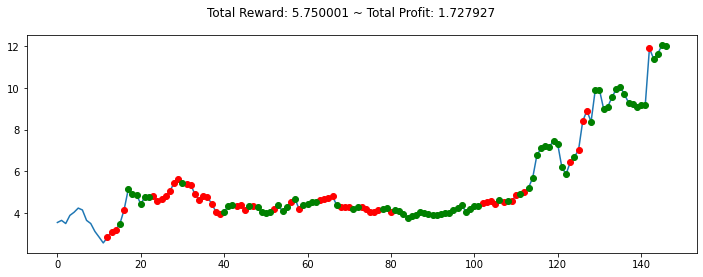

In [162]:
plt.figure(figsize=(12,4))
plt.cla()
env_dqn2.render_all()
plt.show()

### Proximal Policy Optimization (PPO)

In [76]:
ppo2 = PPO("MlpPolicy", env2, verbose=1)
ppo2.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2085 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1448        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010853642 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.27       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0569      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 0.26        |
-----------------------------------------
-----------------

------------------------------------------
| time/                   |              |
|    fps                  | 1121         |
|    iterations           | 13           |
|    time_elapsed         | 23           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0042352807 |
|    clip_fraction        | 0.0291       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.187       |
|    explained_variance   | 0.991        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00401     |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.0063      |
|    value_loss           | 0.0182       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1117         |
|    iterations           | 14           |
|    time_elapsed         | 25           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1100         |
|    iterations           | 24           |
|    time_elapsed         | 44           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0018706062 |
|    clip_fraction        | 0.0128       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0596      |
|    explained_variance   | 0.995        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00414      |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 0.0109       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1099         |
|    iterations           | 25           |
|    time_elapsed         | 46           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1097         |
|    iterations           | 35           |
|    time_elapsed         | 65           |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0024098658 |
|    clip_fraction        | 0.0315       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0681      |
|    explained_variance   | 0.926        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0419       |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00985     |
|    value_loss           | 0.0677       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1098         |
|    iterations           | 36           |
|    time_elapsed         | 67           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1090         |
|    iterations           | 46           |
|    time_elapsed         | 86           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0067526437 |
|    clip_fraction        | 0.0262       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0378      |
|    explained_variance   | 0.998        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0127      |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00603     |
|    value_loss           | 0.00319      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1089        |
|    iterations           | 47          |
|    time_elapsed         | 88          |
|    total_times

In [127]:
env_ppo2 = MyCustomEnv2(df=gme_ta, window_size=12, frame_bound=(15,150))
obs = env_ppo2.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = ppo2.predict(obs)
    obs, rewards, done, info = env_ppo2.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 5.100000858306885, 'total_profit': 2.2293687932097397, 'position': 0}


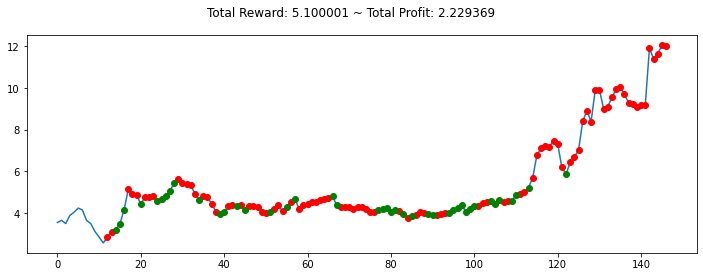

In [163]:
plt.figure(figsize=(12,4))
plt.cla()
env_ppo2.render_all()
plt.show()

## Conclusion

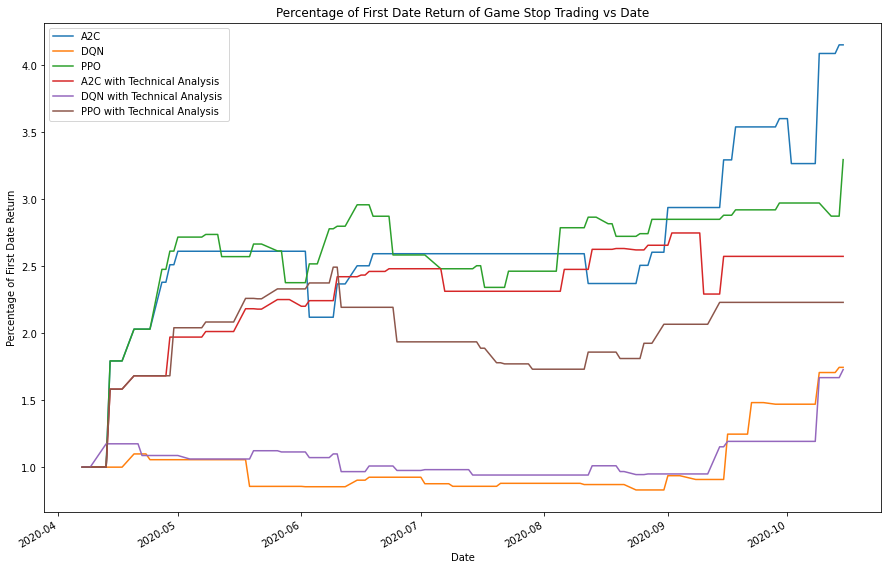

In [135]:
a2c_ret = pd.Series(env_a2c.history['total_profit'], index=gme_ta.index[15+1:150])
dqn_ret = pd.Series(env_dqn.history['total_profit'], index=gme_ta.index[15+1:150])
ppo_ret = pd.Series(env_ppo.history['total_profit'], index=gme_ta.index[15+1:150])
a2c2_ret = pd.Series(env_a2c2.history['total_profit'], index=gme_ta.index[15+1:150])
dqn2_ret = pd.Series(env_dqn2.history['total_profit'], index=gme_ta.index[15+1:150])
ppo2_ret = pd.Series(env_ppo2.history['total_profit'], index=gme_ta.index[15+1:150])

#Visualization parts
plt.figure(figsize=(15,10))
a2c_ret.plot(label='A2C')
dqn_ret.plot(label='DQN')
ppo_ret.plot(label='PPO')
a2c2_ret.plot(label='A2C with Technical Analysis')
dqn2_ret.plot(label='DQN with Technical Analysis ')
ppo2_ret.plot(label='PPO with Technical Analysis')
plt.title('Percentage of First Date Return of Game Stop Trading vs Date')
plt.ylabel('Percentage of First Date Return')
plt.legend()
plt.show()